**Spam Email Classification using Naive Base MultinomialNB**

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [178]:
df = pd.read_csv('email.csv')

In [179]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [181]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [182]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [183]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [184]:
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.3)

In [185]:
vector = CountVectorizer()

In [186]:
x_train_count = vector.fit_transform(x_train.values)

In [187]:
# x_train_count.toarray()[:3]

In [188]:
model = MultinomialNB()

In [189]:
model.fit(x_train_count, y_train)

MultinomialNB()

In [190]:
emails = ['The current leading bid is 151. To pause this auction send OUT. Customer Care: 08718726270',
          'Good day to You too.Pray for me.Remove the teeth as its painful maintaining other stuff.']

In [191]:
emails_count = vector.transform(emails)

In [192]:
model.predict(emails_count)

array([1, 0])

In [193]:
x_test_count = vector.transform(x_test)

In [194]:
from sklearn.pipeline import Pipeline

In [195]:
#define pipline
clf = Pipeline(
    [
        ('vectorizer', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

In [196]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [197]:
clf.score(x_test, y_test)

0.9844497607655502

In [198]:
y_pred = clf.predict(x_test)

In [199]:
# 7. Accuracy
accuracy_naive = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_naive * 100))


Accuracy: 98.44%


In [200]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [201]:
print("Confusion matrix: ", conf_matrix)

Confusion matrix:  [[1442    4]
 [  22  204]]


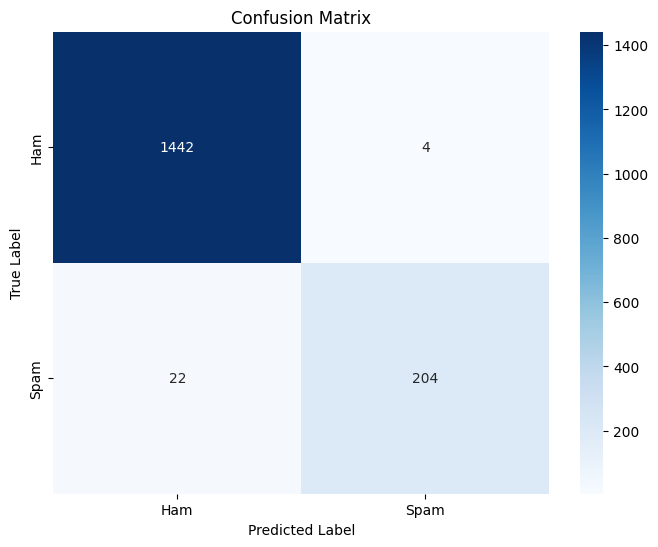

In [202]:
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

True Positives (TP) 1442: This number is the count of emails that were correctly classified as ham
False Positives (FP) 4: This represents the number of emails that were incorrectly classified as spam but actually they are ham.
False Negatives (FN) 22: This is the count of emails that were incorrectly classified as ham when they are actually spam
True Negatives (TN) 204: This number represents the count of emails that were correctly classified as spam

# New Section

**Spam Email Classification using Decision Tree**

In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


In [204]:

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [205]:

df = pd.read_csv('/content/email.csv')


In [206]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [207]:
#  Pre-processing
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [208]:
# Apply the preprocessing
df['Message'] = df['Message'].apply(preprocess_text)


In [209]:
# Feature Selection and convert into array
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message']).toarray()
y = df['Category']

In [210]:
print(X.shape)

(5572, 8078)


In [211]:
#  Apply Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy')


In [212]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [213]:
# Fit the model on training data
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [214]:
# Make Predictions
y_pred = model.predict(X_test)


In [215]:
# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1429   19]
 [  39  185]]


In [216]:
# 7. Accuracy
accuracy_tree = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_tree  * 100))


Accuracy: 96.53%


In [217]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1448
        spam       0.91      0.83      0.86       224

    accuracy                           0.97      1672
   macro avg       0.94      0.91      0.92      1672
weighted avg       0.96      0.97      0.96      1672



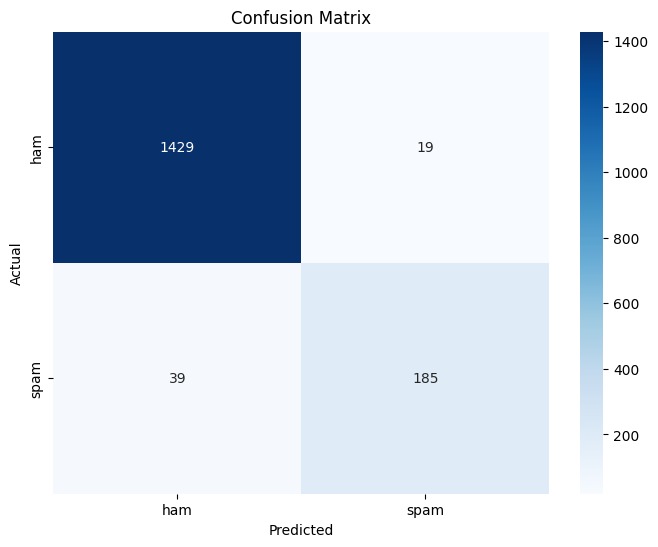

In [218]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Positive (TP): 1429 emails were correctly predicted as ham.
False Positive (FP): 39 emails were incorrectly predicted as spam but they are actually ham.
False Negative (FN): 19 emails were incorrectly predicted as ham but they are actually spam.
True Negative (TN): 185 emails were correctly predicted as spam.

**Comparison of Model Accuracies**

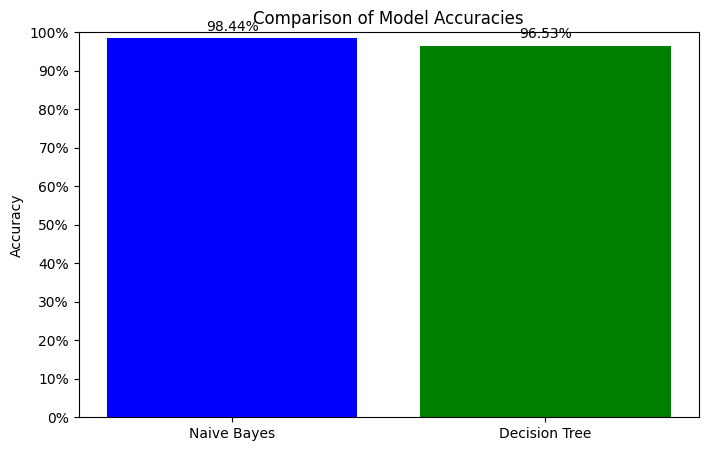

In [221]:


models = ['Naive Bayes', 'Decision Tree']

accuracies = [accuracy_naive, accuracy_tree]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(models)
plt.yticks([i/10.0 for i in range(0, 11)], [f'{i*10}%' for i in range(0, 11)])

# Adding text labels on the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.02, f"{accuracies[i]*100:.2f}%", ha='center')

plt.show()
